In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

from scipy.stats import pearsonr
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
scaler = MinMaxScaler()

In [3]:
df = pd.read_csv('insurance.csv')

In [4]:
#Se aplica drop duplicates y se elimina únicamente un dato.
#el bmi indica el índice de masa corporal
df1=df.drop_duplicates()

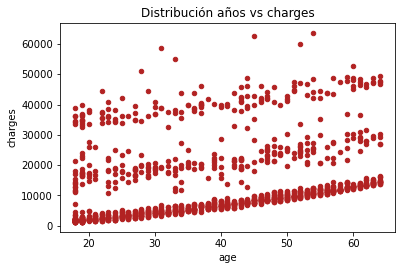

In [5]:
fig, ax = plt.subplots(figsize=(6, 3.84))

df1.plot(
    x    = 'age',
    y    = 'charges',
    c    = 'firebrick',
    kind = "scatter",
    ax   = ax
)
ax.set_title('Distribución años vs charges');

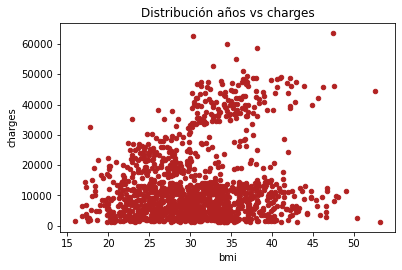

In [6]:
fig, ax = plt.subplots(figsize=(6, 3.84))

df1.plot(
    x    = 'bmi',
    y    = 'charges',
    c    = 'firebrick',
    kind = "scatter",
    ax   = ax
)
ax.set_title('Distribución años vs charges');

In [7]:
#Cambio de las variables categoricas
df2 = pd.get_dummies(df1,columns = ['sex','smoker','region'],drop_first= True)
df2

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


In [8]:
#Normalización de las varibales
scaler.fit(df2)
scaled = scaler.transform(df2)
scaled_df = pd.DataFrame(scaled, columns=df2.columns)
df3=scaled_df
df3

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0.021739,0.321227,0.0,0.251611,0.0,1.0,0.0,0.0,1.0
1,0.000000,0.479150,0.2,0.009636,1.0,0.0,0.0,1.0,0.0
2,0.217391,0.458434,0.6,0.053115,1.0,0.0,0.0,1.0,0.0
3,0.326087,0.181464,0.0,0.333010,1.0,0.0,1.0,0.0,0.0
4,0.304348,0.347592,0.0,0.043816,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1332,0.695652,0.403820,0.6,0.151299,1.0,0.0,1.0,0.0,0.0
1333,0.000000,0.429379,0.0,0.017305,0.0,0.0,0.0,0.0,0.0
1334,0.000000,0.562012,0.0,0.008108,0.0,0.0,0.0,1.0,0.0
1335,0.065217,0.264730,0.0,0.014144,0.0,0.0,0.0,0.0,1.0


In [9]:
#Separación de variables de entrada
x_i=df2.drop(columns = ['charges'])
#normalización de las variables de entrada
scaler.fit(x_i)
scaled = scaler.transform(x_i)
x= pd.DataFrame(scaled, columns=x_i.columns)
y=df2.charges
#División de los datos de entrenamiento y de prueba 
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.4,random_state=10)

In [10]:
dflr=LinearRegression()

dflr.fit(x_train,y_train)

y_pred = dflr.predict(x_test)
#Error de los datos de prueba 
#mean absolute Error
MAE=abs(y_pred-y_test).sum()/len(y_pred)
print('Mean absolute Error')
print(MAE)
#Mean square error
MSE=((y_pred-y_test)**2).sum()/len(y_pred)
print('Mean square error')
print(MSE)
#Mean absolute percentage error
MAPE=abs((y_test-y_pred)/y_test).sum()/len(y_test)
print('Mean absolute percentage error')
print(MAPE)
#Mean percentage error
MPE=((y_test-y_pred)/y_test).sum()/len(y_test)
print('Mean percentage error')
print(MPE)

Mean absolute Error
4143.500400189695
Mean square error
38894035.87687087
Mean absolute percentage error
0.4159129359941374
Mean percentage error
-0.1190922126854117


In [11]:
r2_score(y_test,y_pred)

0.7176727954510571

In [12]:
#Error de los datos de entrenamiento
y_pred2 = dflr.predict(x_train)
y_pred2
MAEp=abs(y_pred2-y_train).sum()/len(y_pred2)
print('Mean absolute Error')
print(MAEp)
#Mean square error
MSEp=((y_pred2-y_train)**2).sum()/len(y_pred2)
print('Mean square error')
print(MSEp)
#Mean absolute percentage error
MAPEp=abs((y_train-y_pred2)/y_train).sum()/len(y_train)
print('Mean absolute percentage error')
print(MAPEp)
#Mean percentage error
MPEp=((y_train-y_pred2)/y_train).sum()/len(y_train)
print('Mean percentage error')
print(MPEp)

Mean absolute Error
4116.061235650138
Mean square error
35309907.11927666
Mean absolute percentage error
0.4020419472687055
Mean percentage error
-0.16028614669391272


##### Cómo se puede observar, el error en los datos predichos es mayor que el de los datos obtenidos con las x de entrenamiento. Esto podría ser un indicativo de overfitting o que el ajuste del modelo no es adecuado para los datos. Por el valor obtenido de R^2, se puede concluir que es posible que sea mpas un problema de ajuste del modelo.

### Segunda parte

In [13]:
#polinomio grado dos
poly_reg=PolynomialFeatures(degree=3)
X_poly=poly_reg.fit_transform(x_train)
poly_reg.fit(X_poly,y_train)
lin_reg2=LinearRegression()
lin_reg2.fit(X_poly,y_train)
y_pred2f=lin_reg2.predict(poly_reg.fit_transform(x_test))
#Error de los datos de prueba 
#mean absolute Error
MAE2=abs(y_pred2f-y_test).sum()/len(y_test)
print('Mean absolute Error')
print(MAE2)
#Mean square error
MSE2=((y_pred2f-y_test)**2).sum()/len(y_test)
print('Mean square error')
print(MSE2)
#Mean absolute percentage error
MAPE2=abs((y_test-y_pred2f)/y_test).sum()/len(y_test)
print('Mean absolute percentage error')
print(MAPE2)
#Mean percentage error
MPE2=((y_test-y_pred2f)/y_test).sum()/len(y_test)
print('Mean percentage error')
print(MPE2)

Mean absolute Error
4157.315789287851
Mean square error
38039430.726667844
Mean absolute percentage error
0.5401178103324541
Mean percentage error
-0.18347806171327158


In [14]:
poly_reg=PolynomialFeatures(degree=2)
X_poly=poly_reg.fit_transform(x_train)
poly_reg.fit(X_poly,y_train)
lin_reg3=LinearRegression()
lin_reg3.fit(X_poly,y_train)
y_pred3f=lin_reg3.predict(poly_reg.fit_transform(x_test))
#Error de los datos de prueba 
#mean absolute Error
MAE3=abs(y_pred3f-y_test).sum()/len(y_test)
print('Mean absolute Error')
print(MAE3)
#Mean square error
MSE3=((y_pred3f-y_test)**2).sum()/len(y_test)
print('Mean square error')
print(MSE3)
#Mean absolute percentage error
MAPE3=abs((y_test-y_pred3f)/y_test).sum()/len(y_test)
print('Mean absolute percentage error')
print(MAPE3)
#Mean percentage error
MPE3=((y_test-y_pred3f)/y_test).sum()/len(y_test)
print('Mean percentage error')
print(MPE3)

Mean absolute Error
3077.44809531434
Mean square error
27875596.842532627
Mean absolute percentage error
0.3331117610784221
Mean percentage error
-0.19694275895371885


In [15]:
ridge1=Ridge(alpha=1)
ridge1.fit(x_train, y_train)
ridge1
y_pred1r=ridge1.predict(x_test)
#Error de los datos de prueba 
#mean absolute Error
MAER1=abs(y_pred1r-y_test).sum()/len(y_test)
print('Mean absolute Error')
print(MAER1)
#Mean square error
MSER1=((y_pred1r-y_test)**2).sum()/len(y_test)
print('Mean square error')
print(MSER1)
#Mean absolute percentage error
MAPER1=abs((y_test-y_pred1r)/y_test).sum()/len(y_test)
print('Mean absolute percentage error')
print(MAPER1)
#Mean percentage error
MPER1=((y_test-y_pred1r)/y_test).sum()/len(y_test)
print('Mean percentage error')
print(MPER1)

Mean absolute Error
4125.891010910473
Mean square error
38821336.00797517
Mean absolute percentage error
0.410744133137898
Mean percentage error
-0.13411972373659276


In [16]:
ridge5=Ridge(alpha=5)
ridge5.fit(x_train, y_train)
ridge5
y_pred5r=ridge5.predict(x_test)
#Error de los datos de prueba 
#mean absolute Error
MAER2=abs(y_pred5r-y_test).sum()/len(y_test)
print('Mean absolute Error')
print(MAER2)
#Mean square error
MSER2=((y_pred5r-y_test)**2).sum()/len(y_test)
print('Mean square error')
print(MSER2)
#Mean absolute percentage error
MAPER2=abs((y_test-y_pred5r)/y_test).sum()/len(y_test)
print('Mean absolute percentage error')
print(MAPER2)
#Mean percentage error
MPER2=((y_test-y_pred5r)/y_test).sum()/len(y_test)
print('Mean percentage error')
print(MPER2)

Mean absolute Error
4107.344796331708
Mean square error
38793888.08682212
Mean absolute percentage error
0.40664843214623003
Mean percentage error
-0.18988848086131788


In [17]:
Final = pd.DataFrame({'MAPE' : [MAPER2, MAPE2, MAPE3, MAPER1,MAPER2]},index=('R.Lineal', 'Poli.G2', 'Poli.G3', 'Ridge_alpha=1','Ridge_alpha=5'))
Final

,MAPE
R.Lineal,0.406648
Poli.G2,0.540118
Poli.G3,0.333112
Ridge_alpha=1,0.410744
Ridge_alpha=5,0.406648


##### Cómo se observa en la tabla, el porcentaje de error medio es para un polínomio de grado3